# Multiple Linear Regression

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [108]:
# Linear Regression model function

def model(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    
    mse = mean_squared_error(y_pred,y_test)
    rmse = np.sqrt(mse)
    r2  = r2_score(y_pred,y_test)

    coef = lr.coef_
    
    return rmse,r2,coef
    

In [49]:
df = pd.read_csv("house.csv")

In [50]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [69]:
corr = df.corr()

In [70]:
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [71]:
corr = corr["price"]
corr

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [72]:
corr.drop(["id","price"],inplace=True)

In [75]:
corr = corr[corr > 0.6] 
corr

sqft_living    0.702035
grade          0.667434
sqft_above     0.605567
Name: price, dtype: float64

In [83]:
cols = corr.index
cols

Index(['sqft_living', 'grade', 'sqft_above'], dtype='object')

<Figure size 432x288 with 0 Axes>

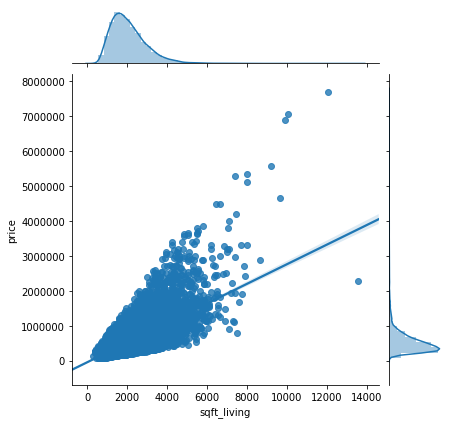

<Figure size 432x288 with 0 Axes>

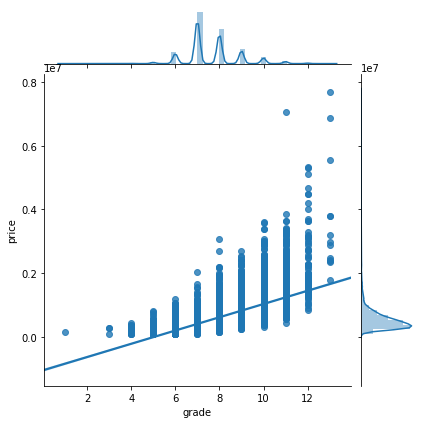

<Figure size 432x288 with 0 Axes>

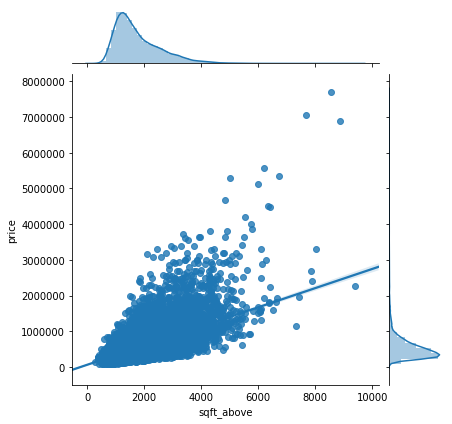

In [91]:
for col in cols:
    plt.figure()
    sns.jointplot(data=df,x=col,y="price",kind="reg")
    plt.show()

In [109]:
# Model with sqft_living

result = model(df[["sqft_living"]],df["price"])
print("Sqft living RMSE :",result[0])
print("Sqft living R2 :",result[1])
print("Sqft living COEF :",result[2][0])

Sqft living RMSE : 278486.7309615027
Sqft living R2 : -0.13920652037464065
Sqft living COEF : 273.80839876543314


In [115]:
# Model with grade

result = model(df[["grade"]],df["price"])
print("Grade RMSE :",result[0])
print("Grade R2 :",result[1])
print("Grade COEF :",result[2][0])

Grade RMSE : 295063.27608339675
Grade R2 : -0.4872428774730846
Grade COEF : 202814.72576988765


In [116]:
# Model with sqft_above

result = model(df[["sqft_above"]],df["price"])
print("Sqft above RMSE :",result[0])
print("Sqft above R2 :",result[1])
print("Sqft above COEF :",result[2][0])

Sqft above RMSE : 312086.9068852428
Sqft above R2 : -0.9723452277263884
Sqft above COEF : 260.63303908183576


### Multiple linear regression

In [117]:
result = model(df[["sqft_living","grade","sqft_above"]],df["price"])
print("MSE :",result[0])
print("R2 :",result[1])
print("COEF :",result[2])

MSE : 266380.6471954782
R2 : 0.03275356328049006
COEF : [ 2.24678531e+02  1.10026834e+05 -7.48193576e+01]


### Check multicolinearity

In [98]:
from scipy.stats import pearsonr

In [99]:
pearsonr(df["sqft_living"],df["grade"])[0]

0.7627044764584702

In [100]:
pearsonr(df["sqft_living"],df["sqft_above"])[0]

0.876596598681318

In [101]:
pearsonr(df["grade"],df["sqft_above"])[0]

0.7559229376236446

### Variance in residuals (Heteroskedacity)

In [39]:
X = df[["sqft_living","grade"]]
y = df["price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
    
residual = y_pred - y_test

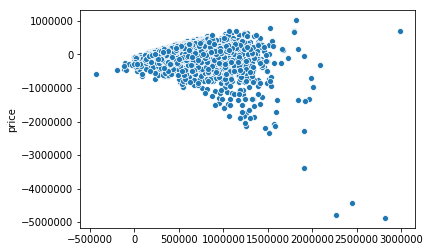

In [119]:
plt.figure(figsize=(6,4))
sns.scatterplot(y_pred,residual)
plt.show()

### Residuals distribution plot (Histogram)

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


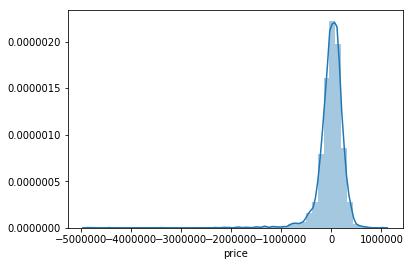

In [120]:
plt.figure()
sns.distplot(residual)
plt.show()